In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import os
import pandas as pd
import numpy as np 
import pickle as pk
import glob
from fbprophet import Prophet
import sys
sys.path.append('../')
import wiki
from wiki import utils 
import multiprocessing as mp
total_proc = None
from tqdm import tqdm
from IPython.display import clear_output

# Results Analysis
* majority of bad are due to trend below zero for val period, which makes it predict all zero
* good ones are GOOD!
* outliers should help without hurting too much

In [3]:
PROPHET_PATH = '../data/prophet/'
RESULTS_PATH = 'results/'
VERSION = 'v1.6/'

In [4]:
df = pd.read_feather(PROPHET_PATH+RESULTS_PATH+VERSION[:-1]+'df.f')
page_index = pd.read_feather(PROPHET_PATH+'page_index.f')

In [5]:
df['v1.6_val'].mean()

81.994184568220561

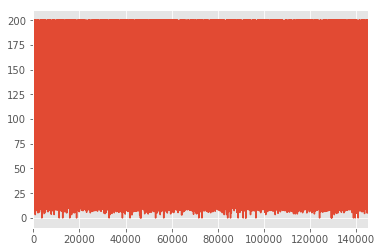

In [6]:
df['v1.6_val'].plot()

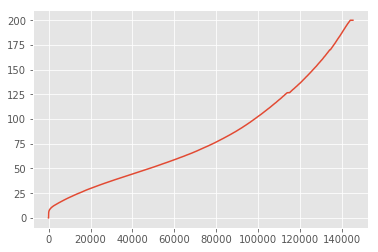

In [7]:
plt.plot((df['v1.6_val'].sort_values().values))

In [ ]:
df.head()

In [ ]:
def load_plot(page):
    forecast = pd.read_feather(PROPHET_PATH+VERSION+page+'df.f')
    wiki.newphet.prophet_plot(forecast)

In [ ]:
for row in df.sort_values(by='v1.6_val',ascending=False).iloc[:1].iterrows():
    print('page_index', row[1][0])
    print('v1.6_val', row[1][2])
    load_plot(row[1][0])

In [ ]:
for row in df.sort_values(by='v1.6_val',ascending=True).iloc[:1].iterrows():
    print('page_index', row[1][0])
    print('v1.6_val', row[1][2])
    load_plot(row[1][0])

In [ ]:
130410

In [ ]:
forecast130410 = pd.read_feather(PROPHET_PATH+VERSION+'130410'+'df.f')

In [ ]:
wiki.newphet.prophet_plot(forecast130410)

In [ ]:
forecast130410.trend.plot()

In [ ]:
forecast130410.trend

In [ ]:
forecast29930 = pd.read_feather(PROPHET_PATH+VERSION+'29930'+'df.f')
with open(PROPHET_PATH+VERSION+'29930'+'m.pk', 'rb') as file:
    m29930 = pk.load(file)

In [ ]:
wiki.newphet.prophet_plot(forecast29930)

In [ ]:
m29930.plot_components(forecast29930);